#Ensemble Classification Modeling & Association Rule Mining

## Imports

In [176]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## DataSet

In [177]:
df = pd.read_csv('Full Data-ER.csv')
df.head(3)

,Technical Skills,Has passed the licensure exam,Communication Skills,Grit,Work Habits & Attitude,Employability
0,2.925,1,3,1,3,Less Employable
1,2.650,1,4,2,4,Employable
2,1.725,2,5,2,4,Employable


## Normalized Data

In [178]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.iloc[:,:5])

scaled = pd.DataFrame(scaled, columns = df.iloc[:,:5].columns)
scaled.head(3)

,Technical Skills,Has passed the licensure exam,Communication Skills,Grit,Work Habits & Attitude
0,0.958904,0.0,0.333333,0.0,0.0
1,0.808219,0.0,0.666667,1.0,0.5
2,0.301370,1.0,1.000000,1.0,0.5


## Train-Test Split

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X = df.iloc[:,:5] #features
y = df.iloc[:, -1] #class labels

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [182]:
# Simple Check

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 5)
(150, 5)
(350,)
(150,)


## Classifier

In [183]:
# Import

from sklearn.neural_network import MLPClassifier # MLP -> neural_network
from sklearn.ensemble import RandomForestClassifier #RF -> decision tree -> ensemble
from sklearn.svm import SVC # SVC -> SVM Classifier

In [184]:
# Instantiate the Models

model1 = MLPClassifier(solver = 'adam', batch_size = 30, activation = 'relu')
model2 = RandomForestClassifier(max_depth = 5, max_features = 'log2', n_estimators = 20)
model3 = SVC(C = 1000, gamma = 0.001, kernel = 'rbf')

## Ensemble Classification Modeling (Max Voting)

In [185]:
# Imports

from sklearn.ensemble import VotingClassifier

In [186]:
# Combined Models

ensemble = VotingClassifier(estimators = [('mlp', model1),('rf', model2),('svm', model3)], voting = 'hard')
ensemble = ensemble.fit(X_train, y_train)

In [187]:
# Predict

ensemble_predictions = ensemble.predict(X_test)

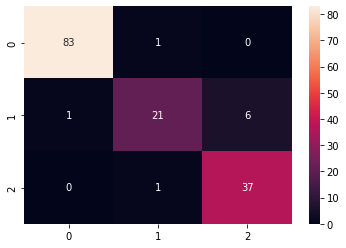

In [188]:
# Confusion Matrix (Ensemble)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, ensemble_predictions)
sns.heatmap(cm, annot = True, fmt = 'g')

In [189]:
# Classification Report

print(classification_report(y_test, ensemble_predictions))

                 precision    recall  f1-score   support

     Employable       0.99      0.99      0.99        84
Less Employable       0.91      0.75      0.82        28
  Underemployed       0.86      0.97      0.91        38

       accuracy                           0.94       150
      macro avg       0.92      0.90      0.91       150
   weighted avg       0.94      0.94      0.94       150



## 10 - Fold Cross-Validated Accuracy Scores

In [190]:
# Import Cross Validation Accuracy Scores

from sklearn.model_selection import cross_val_score

# Function

def cross_validation_score(model, X_test, y_test, splits = 10):

  cv_score = cross_val_score(model, X_test, y_test, cv = splits, scoring = 'accuracy') # [92, 89, 78, 90, 98, 80, 91, 92, 92, 90]

  return cv_score.mean()

In [191]:
# Execute Functions

cross_validation_score(ensemble, X_test, y_test, splits = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.9200000000000002

## Interpretation

In [192]:
# Permutation Feature Importance

#!pip install eli5

import eli5
from eli5.sklearn import PermutationImportance

In [193]:
# Importance

perm = PermutationImportance(ensemble).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2360 ± 0.0275,Grit
0.1947 ± 0.0549,Has passed the licensure exam
0.1267 ± 0.0267,Communication Skills
0.0773 ± 0.0200,Technical Skills
0.0013 ± 0.0053,Work Habits & Attitude


## Association Rule Mining

In [194]:
# Imports

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [195]:
# Load Data

data = pd.read_csv('Apriori Data.csv')
data.head(3)

,Technical Skills,Professional Certifications,Communication Skills,Grit,Work Habits,Employability
0,Technical Skills - Fair,Professional Certifications - 1,Communication Skills - 3,Grit - 1,Work Habits - 3,Less Employable
1,Technical Skills - Fair,Professional Certifications - 1,Communication Skills - 4,Grit - 2,Work Habits - 4,Employable
2,Technical Skills - Very Good,Professional Certifications - 2,Communication Skills - 5,Grit - 2,Work Habits - 4,Employable


In [196]:
# Classes

class_label = 'Underemployed'

employable_data = data[data['Employability'] == class_label]
merged_data = employable_data['Professional Certifications'].str.cat(employable_data[['Communication Skills','Grit','Work Habits', 'Technical Skills']], sep = ",")

In [197]:
merged_data

34     Professional Certifications - 1,Communication Skills - 4,Grit - 1,Work Habits - 4,Technical Skills - Fair
37     Professional Certifications - 1,Communication Skills - 4,Grit - 1,Work Habits - 5,Technical Skills - Fair
40     Professional Certifications - 1,Communication Skills - 4,Grit - 1,Work Habits - 4,Technical Skills - Fair
55     Professional Certifications - 1,Communication Skills - 3,Grit - 1,Work Habits - 5,Technical Skills - Fair
57     Professional Certifications - 1,Communication Skills - 4,Grit - 1,Work Habits - 5,Technical Skills - Good
                                                         ...                                                    
463    Professional Certifications - 1,Communication Skills - 3,Grit - 1,Work Habits - 5,Technical Skills - Fair
474    Professional Certifications - 1,Communication Skills - 4,Grit - 1,Work Habits - 3,Technical Skills - Fair
494    Professional Certifications - 1,Communication Skills - 5,Grit - 1,Work Habits - 5,Technic

In [198]:
# Split

new_data = list(merged_data.apply(lambda x: x.split(",")))

In [199]:
# Tranforms the list, with one-hot encoding

pd.set_option('display.max_colwidth', None)

a = TransactionEncoder()
a_data = a.fit(new_data).transform(new_data)

df = pd.DataFrame(a_data, columns = a.columns_)
df = df.replace(False, 0)
df.head(3)


,Communication Skills - 3,Communication Skills - 4,Communication Skills - 5,Grit - 1,Professional Certifications - 1,Technical Skills - Fair,Technical Skills - Good,Technical Skills - Pass,Work Habits - 3,Work Habits - 4,Work Habits - 5
0,0.0,1.0,0.0,True,True,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,True,True,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,True,True,1.0,0.0,0.0,0.0,1.0,0.0


In [200]:
# Apriori

df = apriori(df, min_support = 0.5, use_colnames = True)
df.sort_values('support', ascending = False)

,support,itemsets
1,1,(Grit - 1)
2,1,(Professional Certifications - 1)
6,1,"(Professional Certifications - 1, Grit - 1)"
3,0.809524,(Technical Skills - Fair)
7,0.809524,"(Technical Skills - Fair, Grit - 1)"
8,0.809524,"(Technical Skills - Fair, Professional Certifications - 1)"
10,0.809524,"(Technical Skills - Fair, Professional Certifications - 1, Grit - 1)"
0,0.62585,(Communication Skills - 4)
4,0.62585,"(Communication Skills - 4, Grit - 1)"
5,0.62585,"(Communication Skills - 4, Professional Certifications - 1)"


In [201]:
# Assocation Rules

df_ar = association_rules(df, metric = 'confidence', min_threshold = 0.6)
df_ar.sort_values('support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Professional Certifications - 1),(Grit - 1),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
5,(Grit - 1),(Professional Certifications - 1),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
21,(Grit - 1),"(Technical Skills - Fair, Professional Certifications - 1)",1.000000,0.809524,0.809524,0.809524,1.0,0.0,1.0
20,(Professional Certifications - 1),"(Technical Skills - Fair, Grit - 1)",1.000000,0.809524,0.809524,0.809524,1.0,0.0,1.0
19,(Technical Skills - Fair),"(Professional Certifications - 1, Grit - 1)",0.809524,1.000000,0.809524,1.000000,1.0,0.0,inf
6,(Technical Skills - Fair),(Grit - 1),0.809524,1.000000,0.809524,1.000000,1.0,0.0,inf
7,(Grit - 1),(Technical Skills - Fair),1.000000,0.809524,0.809524,0.809524,1.0,0.0,1.0
8,(Technical Skills - Fair),(Professional Certifications - 1),0.809524,1.000000,0.809524,1.000000,1.0,0.0,inf
9,(Professional Certifications - 1),(Technical Skills - Fair),1.000000,0.809524,0.809524,0.809524,1.0,0.0,1.0
18,"(Professional Certifications - 1, Grit - 1)",(Technical Skills - Fair),1.000000,0.809524,0.809524,0.809524,1.0,0.0,1.0
